In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [459]:
#data = pd.read_json("黑芝麻.json") #这个是正常情况， 会报错，所以：
data = json.load(open("元祖股份.json")) #这一步读取json文档

#这会显示出一个多维数组，我们把它变成二维数组来转化成dataframe
df = pd.DataFrame(data["GroupItems"])

#取第一行，只要items, 然后转化成dataframe
impactdf_hzm1 = pd.DataFrame(df.iloc[0,:]["Items"])

#显示该dataframe
impactdf_hzm1

,Count,Desc,Value
0,227,其他,0000
1,3,高管违法,1100
2,46,高管变动,1200
3,9,违法违纪,2000
4,10,造假欺诈,2100
5,24,违纪违规,2300
6,2,安全事故,2600
7,2,司法纠纷,2700
8,9,侵权抄袭,2800
9,150,上市退市,3100


In [460]:
#取第二行做第二项
impactdf_hzm2 = pd.DataFrame(df.iloc[1,:]["Items"])

impactdf_hzm2

,Count,Desc,Value
0,97,消极,negative
1,349,中立,none
2,239,积极,positive


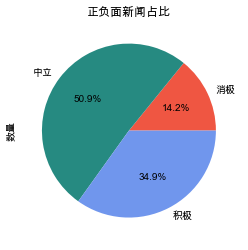

In [461]:
plt.pie(impactdf_hzm2['Count'], labels=impactdf_hzm2['Desc'], colors=[(0.9381,0.3364,0.2583),
(0.1503,0.5428,0.5058),
(0.4391,0.5878,0.9293),], autopct='%1.1f%%')
plt.ylabel('数量')
plt.title('正负面新闻占比')
plt.show()

In [462]:
#得到负面消息类别top10
impactdf_hzm1wc = impactdf_hzm1.nlargest(10, 'Count')
impactdf_hzm1wc

,Count,Desc,Value
0,227,其他,0000
11,185,投资融资,3300
9,150,上市退市,3100
10,148,亏损盈利,3200
14,62,股权变动,3600
2,46,高管变动,1200
18,43,产品相关,5000
17,38,成果信誉,4000
15,36,增持减持,3700
5,24,违纪违规,2300


In [463]:
comment = ""
for word in impactdf_hzm1wc["Desc"]:
    comment += (word + " ")
comment

'其他 投资融资 上市退市 亏损盈利 股权变动 高管变动 产品相关 成果信誉 增持减持 违纪违规 '

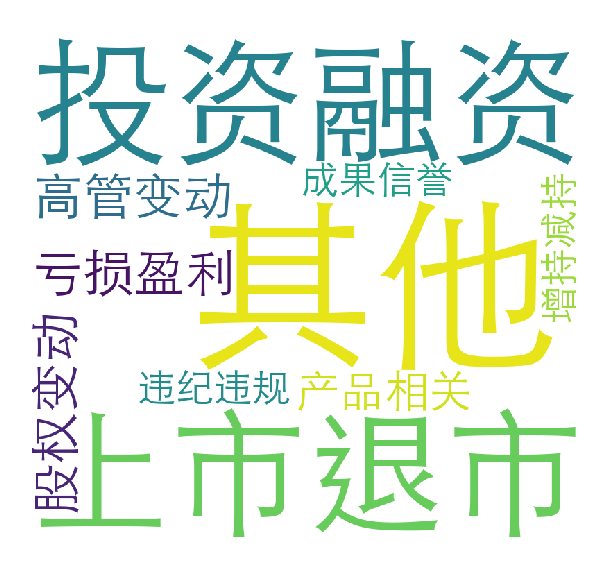

In [464]:
#用top10消息类别制作词云
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10, font_path='/System/Library/Fonts/STHeiti Light.ttc').generate(comment)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [374]:
#制作词云失败，试一下图表？